## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 117us/step - loss: 2.2739 - accuracy: 0.1522 - val_loss: 2.2192 - val_accuracy: 0.1900
Epoch 2/500
50000/50000 [==============================] - 5s 108us/step - loss: 2.1877 - accuracy: 0.2074 - val_loss: 2.1575 - val_accuracy: 0.2232
Epoch 3/500
50000/50000 [==============================] - 5s 109us/step - loss: 2.1325 - accuracy: 0.2394 - val_loss: 2.1089 - val_accuracy: 0.2534
Epoch 4/500
50000/50000 [==============================] - 6s 112us/step - loss: 2.0885 - accuracy: 0.2625 - val_loss: 2.0684 - val_accuracy: 0.2725
Epoch 5/500
50000/50000 [==============================] - 6s 120us/step - loss: 2.0516 - accuracy: 0.2785 - val_loss: 2.0350 - val_accuracy: 0.2841
Epoch 6/500
50000/50000 [==============================] - 6s 127us/step - loss: 2.0203 - accuracy: 0.2896 - val_loss: 2.0068 - val_accuracy: 0.2940
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 9s 180us/step - loss: 1.6649 - accuracy: 0.4209 - val_loss: 1.6694 - val_accuracy: 0.4196
Epoch 56/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.6615 - accuracy: 0.4234 - val_loss: 1.6665 - val_accuracy: 0.4194
Epoch 57/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.6584 - accuracy: 0.4237 - val_loss: 1.6641 - val_accuracy: 0.4221
Epoch 58/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.6555 - accuracy: 0.4250 - val_loss: 1.6623 - val_accuracy: 0.4217
Epoch 59/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.6523 - accuracy: 0.4267 - val_loss: 1.6576 - val_accuracy: 0.4228
Epoch 60/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.6494 - accuracy: 0.4272 - val_loss: 1.6545 - val_accuracy: 0.4257
Epoch 61/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.6463 - accuracy: 0.4288 - val

50000/50000 [==============================] - 9s 170us/step - loss: 1.5319 - accuracy: 0.4685 - val_loss: 1.5546 - val_accuracy: 0.4569
Epoch 110/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.5301 - accuracy: 0.4687 - val_loss: 1.5506 - val_accuracy: 0.4600
Epoch 111/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.5281 - accuracy: 0.4698 - val_loss: 1.5480 - val_accuracy: 0.4615
Epoch 112/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.5264 - accuracy: 0.4711 - val_loss: 1.5480 - val_accuracy: 0.4588
Epoch 113/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.5244 - accuracy: 0.4722 - val_loss: 1.5503 - val_accuracy: 0.4557
Epoch 114/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.5223 - accuracy: 0.4724 - val_loss: 1.5451 - val_accuracy: 0.4574
Epoch 115/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.5206 - accuracy: 0.4726

50000/50000 [==============================] - 8s 166us/step - loss: 1.4405 - accuracy: 0.5001 - val_loss: 1.4864 - val_accuracy: 0.4783
Epoch 164/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.4391 - accuracy: 0.5006 - val_loss: 1.4913 - val_accuracy: 0.4760
Epoch 165/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.4370 - accuracy: 0.5010 - val_loss: 1.4949 - val_accuracy: 0.4759
Epoch 166/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.4360 - accuracy: 0.5016 - val_loss: 1.4846 - val_accuracy: 0.4777
Epoch 167/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.4342 - accuracy: 0.5012 - val_loss: 1.4826 - val_accuracy: 0.4819
Epoch 168/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.4326 - accuracy: 0.5031 - val_loss: 1.4835 - val_accuracy: 0.4804
Epoch 169/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.4308 - accuracy: 0.5035

50000/50000 [==============================] - 8s 169us/step - loss: 1.3614 - accuracy: 0.5263 - val_loss: 1.4315 - val_accuracy: 0.4918
Epoch 218/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.3602 - accuracy: 0.5279 - val_loss: 1.4318 - val_accuracy: 0.4973
Epoch 219/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.3589 - accuracy: 0.5270 - val_loss: 1.4359 - val_accuracy: 0.4962
Epoch 220/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.3575 - accuracy: 0.5280 - val_loss: 1.4354 - val_accuracy: 0.4889
Epoch 221/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.3563 - accuracy: 0.5283 - val_loss: 1.4325 - val_accuracy: 0.4945
Epoch 222/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.3544 - accuracy: 0.5308 - val_loss: 1.4320 - val_accuracy: 0.4929
Epoch 223/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.3540 - accuracy: 0.5289

50000/50000 [==============================] - 9s 181us/step - loss: 1.2919 - accuracy: 0.5500 - val_loss: 1.3962 - val_accuracy: 0.5072
Epoch 272/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.2905 - accuracy: 0.5507 - val_loss: 1.3986 - val_accuracy: 0.5047
Epoch 273/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.2905 - accuracy: 0.5514 - val_loss: 1.3962 - val_accuracy: 0.5028
Epoch 274/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.2884 - accuracy: 0.5512 - val_loss: 1.3950 - val_accuracy: 0.5013
Epoch 275/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.2869 - accuracy: 0.5511 - val_loss: 1.3983 - val_accuracy: 0.5061
Epoch 276/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.2861 - accuracy: 0.5521 - val_loss: 1.3945 - val_accuracy: 0.5035
Epoch 277/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.2849 - accuracy: 0.

50000/50000 [==============================] - 8s 167us/step - loss: 1.2297 - accuracy: 0.5706 - val_loss: 1.3913 - val_accuracy: 0.5088
Epoch 326/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.2278 - accuracy: 0.5711 - val_loss: 1.3820 - val_accuracy: 0.5104
Epoch 327/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.2278 - accuracy: 0.5715 - val_loss: 1.3733 - val_accuracy: 0.5126
Epoch 328/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.2263 - accuracy: 0.5730 - val_loss: 1.3785 - val_accuracy: 0.5116
Epoch 329/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.2249 - accuracy: 0.5725 - val_loss: 1.4016 - val_accuracy: 0.5019
Epoch 330/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.2235 - accuracy: 0.5724 - val_loss: 1.3687 - val_accuracy: 0.5137
Epoch 331/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.2230 - accuracy: 0.5730

50000/50000 [==============================] - 10s 200us/step - loss: 1.1708 - accuracy: 0.5892 - val_loss: 1.3514 - val_accuracy: 0.5195
Epoch 380/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.1702 - accuracy: 0.5907 - val_loss: 1.3890 - val_accuracy: 0.5092
Epoch 381/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.1696 - accuracy: 0.5916 - val_loss: 1.3692 - val_accuracy: 0.5133
Epoch 382/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.1677 - accuracy: 0.5924 - val_loss: 1.3459 - val_accuracy: 0.5182
Epoch 383/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.1660 - accuracy: 0.5925 - val_loss: 1.3502 - val_accuracy: 0.5188
Epoch 384/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.1657 - accuracy: 0.5922 - val_loss: 1.3611 - val_accuracy: 0.5172
Epoch 385/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.1641 - accuracy:

Epoch 433/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.1155 - accuracy: 0.6102 - val_loss: 1.3652 - val_accuracy: 0.5192
Epoch 434/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.1153 - accuracy: 0.6096 - val_loss: 1.3432 - val_accuracy: 0.5256
Epoch 435/500
50000/50000 [==============================] - 10s 210us/step - loss: 1.1124 - accuracy: 0.6104 - val_loss: 1.3371 - val_accuracy: 0.5249
Epoch 436/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.1139 - accuracy: 0.6112 - val_loss: 1.3891 - val_accuracy: 0.5111
Epoch 437/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.1130 - accuracy: 0.6102 - val_loss: 1.3293 - val_accuracy: 0.5290
Epoch 438/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.1115 - accuracy: 0.6104 - val_loss: 1.3401 - val_accuracy: 0.5261
Epoch 439/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.10

Epoch 487/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.0613 - accuracy: 0.6282 - val_loss: 1.3454 - val_accuracy: 0.5249
Epoch 488/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.0631 - accuracy: 0.6280 - val_loss: 1.3304 - val_accuracy: 0.5295
Epoch 489/500
50000/50000 [==============================] - 9s 190us/step - loss: 1.0604 - accuracy: 0.6282 - val_loss: 1.3262 - val_accuracy: 0.5319
Epoch 490/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.0592 - accuracy: 0.6296 - val_loss: 1.3678 - val_accuracy: 0.5212
Epoch 491/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.0596 - accuracy: 0.6289 - val_loss: 1.3601 - val_accuracy: 0.5243
Epoch 492/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.0590 - accuracy: 0.6303 - val_loss: 1.3426 - val_accuracy: 0.5303
Epoch 493/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.057

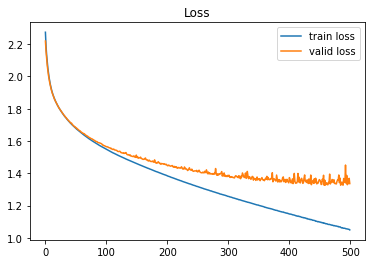

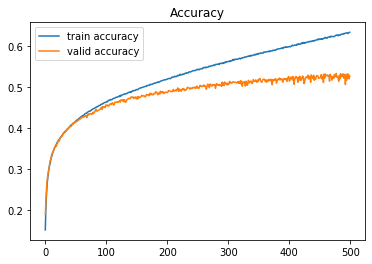

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()